# Comparison


In [24]:
import pandas as pd
import numpy as np
import os
import pickle

pd.set_option("display.max_columns", None)

In [25]:
from scripts.params import get_params

params = get_params()

In [26]:
from scripts.epftoolbox_dm_gw import DM, plot_multivariate_DM_test, GW, plot_multivariate_GW_test

In [27]:
dataroute = os.path.join("..", "data")
dumproute = os.path.join("..", "dump")
resultsroute = os.path.join("..", "results")
graphsroute = os.path.join(resultsroute, "graphs")

In [28]:
start_test = params["start_test"]
local_suffix = params["local_suffix"]

In [29]:
name = f'finaldf_test_{params["tablename"]}.pickle'
filename = os.path.join(dataroute, name)
with open(filename, "rb") as handle:
    df_test = pickle.load(handle)

In [30]:
def get_all_results_matching(substring:str):
    all_results = {}

    for filename in os.listdir(resultsroute):
        file_path = os.path.join(resultsroute, filename)
        if os.path.isfile(file_path) and substring in filename:
            all_results[filename] = file_path

    print(all_results)
    return all_results

In [31]:
all_forecasts = get_all_results_matching("forecast")
all_residuals = get_all_results_matching("residual")

{'GARCH_AR_^MERV_aic_best_forecasts.pickle': '..\\results\\GARCH_AR_^MERV_aic_best_forecasts.pickle', 'GARCH_AR_^MERV_bic_best_forecasts.pickle': '..\\results\\GARCH_AR_^MERV_bic_best_forecasts.pickle', 'HMM_multiv_AR_^MERV_aic_best_forecasts.pickle': '..\\results\\HMM_multiv_AR_^MERV_aic_best_forecasts.pickle', 'HMM_multiv_AR_^MERV_bic_best_forecasts.pickle': '..\\results\\HMM_multiv_AR_^MERV_bic_best_forecasts.pickle', 'HMM_univ_AR_^MERV_aic_best_forecasts.pickle': '..\\results\\HMM_univ_AR_^MERV_aic_best_forecasts.pickle', 'HMM_univ_AR_^MERV_bic_best_forecasts.pickle': '..\\results\\HMM_univ_AR_^MERV_bic_best_forecasts.pickle', 'HMM_with_vol_AR_^MERV_aic_best_forecasts.pickle': '..\\results\\HMM_with_vol_AR_^MERV_aic_best_forecasts.pickle', 'HMM_with_vol_AR_^MERV_bic_best_forecasts.pickle': '..\\results\\HMM_with_vol_AR_^MERV_bic_best_forecasts.pickle', 'VAR_multiv_AR_^MERV_aic_best_forecasts.pickle': '..\\results\\VAR_multiv_AR_^MERV_aic_best_forecasts.pickle', 'VAR_multiv_AR_^MERV

In [32]:
def get_only_log_rets(dict_with_dfs: dict, stock: str):
    if type(dict_with_dfs[stock]) == pd.Series:
        # univariate models are saved as series
        df = pd.DataFrame(dict_with_dfs[stock])

    else:
        try:
            # multivariate models are saved as dataframes
            df = pd.DataFrame(dict_with_dfs[stock][f"{stock}_log_rets"])
        except:  # TODO: SACAR ESTO! Es un chanchullo pq hay algunas que son guardadas como None
            pass
    return df

In [33]:
def create_df_from_results_dict(results_dict:dict, substring_to_replace:str):
    created_df = pd.DataFrame()

    for name, dir in results_dict.items():
        dict_with_dfs = pd.read_pickle(dir)
        print(name)

        for stock in dict_with_dfs.keys():
            df = get_only_log_rets(dict_with_dfs, stock)

            modelname = (
                name.replace(f"{substring_to_replace}.pickle", "")
                .replace("best", "")
                .replace(params["tablename"], "")
                .replace("__", "_")
                .replace("__", "_")
            )

            df.columns = [modelname + "_" + stock]

            created_df = pd.merge(
                created_df, df, left_index=True, right_index=True, how="outer"
            )

    created_df.index = pd.to_datetime(created_df.index)
    created_df = created_df[created_df.index > start_test]
    return created_df

In [34]:
forecasts_df = create_df_from_results_dict(all_forecasts, "forecasts")
forecasts_df.tail(2)

GARCH_AR_^MERV_aic_best_forecasts.pickle
GARCH_AR_^MERV_bic_best_forecasts.pickle
HMM_multiv_AR_^MERV_aic_best_forecasts.pickle


HMM_multiv_AR_^MERV_bic_best_forecasts.pickle
HMM_univ_AR_^MERV_aic_best_forecasts.pickle
HMM_univ_AR_^MERV_bic_best_forecasts.pickle
HMM_with_vol_AR_^MERV_aic_best_forecasts.pickle
HMM_with_vol_AR_^MERV_bic_best_forecasts.pickle
VAR_multiv_AR_^MERV_aic_best_forecasts.pickle
VAR_multiv_AR_^MERV_bic_best_forecasts.pickle
VAR_with_vol_AR_^MERV_aic_best_forecasts.pickle
VAR_with_vol_AR_^MERV_bic_best_forecasts.pickle


,GARCH_aic__^MERV,GARCH_aic__GGAL.BA,GARCH_aic__GGAL,GARCH_aic__YPFD.BA,GARCH_aic__YPF,GARCH_aic__EDN.BA,GARCH_aic__EDN,GARCH_aic__BMA.BA,GARCH_aic__BMA,GARCH_aic__BBAR.BA,GARCH_aic__BBAR,GARCH_bic__^MERV,GARCH_bic__GGAL.BA,GARCH_bic__GGAL,GARCH_bic__YPFD.BA,GARCH_bic__YPF,GARCH_bic__EDN.BA,GARCH_bic__EDN,GARCH_bic__BMA.BA,GARCH_bic__BMA,GARCH_bic__BBAR.BA,GARCH_bic__BBAR,HMM_multiv_aic__^MERV,HMM_multiv_aic__GGAL.BA,HMM_multiv_aic__GGAL,HMM_multiv_aic__YPFD.BA,HMM_multiv_aic__YPF,HMM_multiv_aic__EDN.BA,HMM_multiv_aic__EDN,HMM_multiv_aic__BMA.BA,HMM_multiv_aic__BMA,HMM_multiv_aic__BBAR.BA,HMM_multiv_aic__BBAR,HMM_multiv_bic__^MERV,HMM_multiv_bic__GGAL.BA,HMM_multiv_bic__GGAL,HMM_multiv_bic__YPFD.BA,HMM_multiv_bic__YPF,HMM_multiv_bic__EDN.BA,HMM_multiv_bic__EDN,HMM_multiv_bic__BMA.BA,HMM_multiv_bic__BMA,HMM_multiv_bic__BBAR.BA,HMM_multiv_bic__BBAR,HMM_univ_aic__^MERV,HMM_univ_aic__GGAL.BA,HMM_univ_aic__GGAL,HMM_univ_aic__YPFD.BA,HMM_univ_aic__YPF,HMM_univ_aic__EDN.BA,HMM_univ_aic__EDN,HMM_univ_aic__BMA.BA,HMM_univ_aic__BMA,HMM_univ_aic__BBAR.BA,HMM_univ_aic__BBAR,HMM_univ_bic__^MERV,HMM_univ_bic__GGAL.BA,HMM_univ_bic__GGAL,HMM_univ_bic__YPFD.BA,HMM_univ_bic__YPF,HMM_univ_bic__EDN.BA,HMM_univ_bic__EDN,HMM_univ_bic__BMA.BA,HMM_univ_bic__BMA,HMM_univ_bic__BBAR.BA,HMM_univ_bic__BBAR,HMM_with_vol_aic__^MERV,HMM_with_vol_aic__GGAL.BA,HMM_with_vol_aic__GGAL,HMM_with_vol_aic__YPFD.BA,HMM_with_vol_aic__YPF,HMM_with_vol_aic__EDN.BA,HMM_with_vol_aic__EDN,HMM_with_vol_aic__BMA.BA,HMM_with_vol_aic__BMA,HMM_with_vol_aic__BBAR.BA,HMM_with_vol_aic__BBAR,HMM_with_vol_bic__^MERV,HMM_with_vol_bic__GGAL.BA,HMM_with_vol_bic__GGAL,HMM_with_vol_bic__YPFD.BA,HMM_with_vol_bic__YPF,HMM_with_vol_bic__EDN.BA,HMM_with_vol_bic__EDN,HMM_with_vol_bic__BMA.BA,HMM_with_vol_bic__BMA,HMM_with_vol_bic__BBAR.BA,HMM_with_vol_bic__BBAR,VAR_multiv_aic__^MERV,VAR_multiv_aic__GGAL.BA,VAR_multiv_aic__GGAL,VAR_multiv_aic__YPFD.BA,VAR_multiv_aic__YPF,VAR_multiv_aic__EDN.BA,VAR_multiv_aic__EDN,VAR_multiv_aic__BMA.BA,VAR_multiv_aic__BMA,VAR_multiv_aic__BBAR.BA,VAR_multiv_aic__BBAR,VAR_multiv_bic__^MERV,VAR_multiv_bic__GGAL.BA,VAR_multiv_bic__GGAL,VAR_multiv_bic__YPFD.BA,VAR_multiv_bic__YPF,VAR_multiv_bic__EDN.BA,VAR_multiv_bic__EDN,VAR_multiv_bic__BMA.BA,VAR_multiv_bic__BMA,VAR_multiv_bic__BBAR.BA,VAR_multiv_bic__BBAR,VAR_with_vol_aic__^MERV,VAR_with_vol_aic__GGAL.BA,VAR_with_vol_aic__GGAL,VAR_with_vol_aic__YPFD.BA,VAR_with_vol_aic__YPF,VAR_with_vol_aic__EDN.BA,VAR_with_vol_aic__EDN,VAR_with_vol_aic__BMA.BA,VAR_with_vol_aic__BMA,VAR_with_vol_aic__BBAR.BA,VAR_with_vol_aic__BBAR,VAR_with_vol_bic__^MERV,VAR_with_vol_bic__GGAL.BA,VAR_with_vol_bic__GGAL,VAR_with_vol_bic__YPFD.BA,VAR_with_vol_bic__YPF,VAR_with_vol_bic__EDN.BA,VAR_with_vol_bic__EDN,VAR_with_vol_bic__BMA.BA,VAR_with_vol_bic__BMA,VAR_with_vol_bic__BBAR.BA,VAR_with_vol_bic__BBAR
2024-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010045,0.008948,0.006574,0.005943,0.004569,0.006996,0.003037,0.007833,0.004883,0.012642,0.000839,0.010045,0.008934,0.002435,0.005943,0.001161,0.006996,0.003037,0.007833,0.000834,0.012642,0.000828,0.007456,0.008107,0.001974,0.006458,0.000172,0.004552,0.008707,0.007468,0.000557,0.011155,0.000257,0.007456,0.010842,0.001974,0.00597,0.002337,0.006437,-0.000633,0.007468,0.002668,0.011155,0.006049,0.006791,0.00807,0.002213,0.005943,0.000798,0.006505,-0.001257,0.007178,0.000724,0.005405,0.00702,0.006791,0.008079,0.001987,0.005943,0.000798,0.006505,-0.001257,0.007178,0.000764,0.005413,0.00702,0.003019,0.009094,0.022918,-0.02867,-0.011735,-0.015060,0.035550,-0.010693,0.028807,0.051517,0.038102,0.013982,0.011307,0.000080,0.018678,0.008880,0.029993,0.021388,0.034371,0.006071,0.021509,0.003283,0.005950,-0.012750,0.011082,-0.000411,-0.007386,0.018066,0.001640,-0.052735,0.010334,0.011622,0.004907,0.012410,0.000256,-0.002729,0.008831,-0.001265,0.008150,0.003395,0.009760,0.005568,0.002077,0.004942
2024-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [35]:
residual_df = create_df_from_results_dict(all_residuals, "residuals")
residual_df.head(2)

GARCH_AR_^MERV_aic_best_residuals.pickle
GARCH_AR_^MERV_bic_best_residuals.pickle
HMM_multiv_AR_^MERV_aic_best_residuals.pickle
HMM_multiv_AR_^MERV_bic_best_residuals.pickle
HMM_univ_AR_^MERV_aic_best_residuals.pickle
HMM_univ_AR_^MERV_bic_best_residuals.pickle
HMM_with_vol_AR_^MERV_aic_best_residuals.pickle
HMM_with_vol_AR_^MERV_bic_best_residuals.pickle
VAR_multiv_AR_^MERV_aic_best_residuals.pickle
VAR_multiv_AR_^MERV_bic_best_residuals.pickle
VAR_with_vol_AR_^MERV_aic_best_residuals.pickle
VAR_with_vol_AR_^MERV_bic_best_residuals.pickle


,GARCH_aic__^MERV,GARCH_aic__GGAL.BA,GARCH_aic__GGAL,GARCH_aic__YPFD.BA,GARCH_aic__YPF,GARCH_aic__EDN.BA,GARCH_aic__EDN,GARCH_aic__BMA.BA,GARCH_aic__BMA,GARCH_aic__BBAR.BA,GARCH_aic__BBAR,GARCH_bic__^MERV,GARCH_bic__GGAL.BA,GARCH_bic__GGAL,GARCH_bic__YPFD.BA,GARCH_bic__YPF,GARCH_bic__EDN.BA,GARCH_bic__EDN,GARCH_bic__BMA.BA,GARCH_bic__BMA,GARCH_bic__BBAR.BA,GARCH_bic__BBAR,HMM_multiv_aic__^MERV,HMM_multiv_aic__GGAL.BA,HMM_multiv_aic__GGAL,HMM_multiv_aic__YPFD.BA,HMM_multiv_aic__YPF,HMM_multiv_aic__EDN.BA,HMM_multiv_aic__EDN,HMM_multiv_aic__BMA.BA,HMM_multiv_aic__BMA,HMM_multiv_aic__BBAR.BA,HMM_multiv_aic__BBAR,HMM_multiv_bic__^MERV,HMM_multiv_bic__GGAL.BA,HMM_multiv_bic__GGAL,HMM_multiv_bic__YPFD.BA,HMM_multiv_bic__YPF,HMM_multiv_bic__EDN.BA,HMM_multiv_bic__EDN,HMM_multiv_bic__BMA.BA,HMM_multiv_bic__BMA,HMM_multiv_bic__BBAR.BA,HMM_multiv_bic__BBAR,HMM_univ_aic__^MERV,HMM_univ_aic__GGAL.BA,HMM_univ_aic__GGAL,HMM_univ_aic__YPFD.BA,HMM_univ_aic__YPF,HMM_univ_aic__EDN.BA,HMM_univ_aic__EDN,HMM_univ_aic__BMA.BA,HMM_univ_aic__BMA,HMM_univ_aic__BBAR.BA,HMM_univ_aic__BBAR,HMM_univ_bic__^MERV,HMM_univ_bic__GGAL.BA,HMM_univ_bic__GGAL,HMM_univ_bic__YPFD.BA,HMM_univ_bic__YPF,HMM_univ_bic__EDN.BA,HMM_univ_bic__EDN,HMM_univ_bic__BMA.BA,HMM_univ_bic__BMA,HMM_univ_bic__BBAR.BA,HMM_univ_bic__BBAR,HMM_with_vol_aic__^MERV,HMM_with_vol_aic__GGAL.BA,HMM_with_vol_aic__GGAL,HMM_with_vol_aic__YPFD.BA,HMM_with_vol_aic__YPF,HMM_with_vol_aic__EDN.BA,HMM_with_vol_aic__EDN,HMM_with_vol_aic__BMA.BA,HMM_with_vol_aic__BMA,HMM_with_vol_aic__BBAR.BA,HMM_with_vol_aic__BBAR,HMM_with_vol_bic__^MERV,HMM_with_vol_bic__GGAL.BA,HMM_with_vol_bic__GGAL,HMM_with_vol_bic__YPFD.BA,HMM_with_vol_bic__YPF,HMM_with_vol_bic__EDN.BA,HMM_with_vol_bic__EDN,HMM_with_vol_bic__BMA.BA,HMM_with_vol_bic__BMA,HMM_with_vol_bic__BBAR.BA,HMM_with_vol_bic__BBAR,VAR_multiv_aic__^MERV,VAR_multiv_aic__GGAL.BA,VAR_multiv_aic__GGAL,VAR_multiv_aic__YPFD.BA,VAR_multiv_aic__YPF,VAR_multiv_aic__EDN.BA,VAR_multiv_aic__EDN,VAR_multiv_aic__BMA.BA,VAR_multiv_aic__BMA,VAR_multiv_aic__BBAR.BA,VAR_multiv_aic__BBAR,VAR_multiv_bic__^MERV,VAR_multiv_bic__GGAL.BA,VAR_multiv_bic__GGAL,VAR_multiv_bic__YPFD.BA,VAR_multiv_bic__YPF,VAR_multiv_bic__EDN.BA,VAR_multiv_bic__EDN,VAR_multiv_bic__BMA.BA,VAR_multiv_bic__BMA,VAR_multiv_bic__BBAR.BA,VAR_multiv_bic__BBAR,VAR_with_vol_aic__^MERV,VAR_with_vol_aic__GGAL.BA,VAR_with_vol_aic__GGAL,VAR_with_vol_aic__YPFD.BA,VAR_with_vol_aic__YPF,VAR_with_vol_aic__EDN.BA,VAR_with_vol_aic__EDN,VAR_with_vol_aic__BMA.BA,VAR_with_vol_aic__BMA,VAR_with_vol_aic__BBAR.BA,VAR_with_vol_aic__BBAR,VAR_with_vol_bic__^MERV,VAR_with_vol_bic__GGAL.BA,VAR_with_vol_bic__GGAL,VAR_with_vol_bic__YPFD.BA,VAR_with_vol_bic__YPF,VAR_with_vol_bic__EDN.BA,VAR_with_vol_bic__EDN,VAR_with_vol_bic__BMA.BA,VAR_with_vol_bic__BMA,VAR_with_vol_bic__BBAR.BA,VAR_with_vol_bic__BBAR
2023-06-01,0.026022,0.021342,0.015617,0.031394,0.023377,0.046265,0.034434,0.055441,0.04302,0.037397,0.034038,0.026022,0.021075,0.015719,0.031544,0.023621,0.046265,0.034645,0.055764,0.043030,0.03746,0.034085,NaN,0.019919,NaN,0.032966,NaN,NaN,0.031694,0.054982,NaN,NaN,0.033921,NaN,0.019972,0.016797,0.032966,0.023839,NaN,0.031694,0.054982,0.041634,NaN,0.033921,0.026794,0.021310,0.016616,0.031943,0.023704,0.037611,0.031630,0.055510,0.041000,0.039534,0.033557,0.026794,0.022685,0.016616,0.032336,0.024999,0.048033,0.030821,0.055510,0.042724,0.039534,0.034412,0.027057,0.019807,0.016794,0.032966,0.023839,0.049542,0.029052,0.053963,0.041634,0.038194,0.033928,0.026652,0.019807,0.016797,0.032966,0.023839,0.049542,0.029052,0.053963,0.041634,0.038195,0.033928,-0.016992,-0.005055,-0.007385,-0.024152,-0.020755,0.015158,0.011195,-0.024282,-0.032684,-0.035031,-0.023137,-0.005065,0.018634,0.011620,-0.025967,-0.030125,0.027929,0.023654,-0.017738,-0.025337,-0.023260,-0.025637,-0.006376,-0.004743,-0.001011,-0.028739,-0.032956,0.012829,0.013037,-0.015120,-0.028064,-0.030119,-0.021426,-0.007458,0.01903,0.008346,-0.024900,-0.026873,0.025552,0.024263,-0.019574,-0.02209

In [36]:
lower_date=pd.to_datetime(params["start_test"])+pd.Timedelta(days=1)
higher_date=pd.to_datetime(params["end_test"])-pd.Timedelta(days=1)
residual_df[lower_date:higher_date]

,GARCH_aic__^MERV,GARCH_aic__GGAL.BA,GARCH_aic__GGAL,GARCH_aic__YPFD.BA,GARCH_aic__YPF,GARCH_aic__EDN.BA,GARCH_aic__EDN,GARCH_aic__BMA.BA,GARCH_aic__BMA,GARCH_aic__BBAR.BA,GARCH_aic__BBAR,GARCH_bic__^MERV,GARCH_bic__GGAL.BA,GARCH_bic__GGAL,GARCH_bic__YPFD.BA,GARCH_bic__YPF,GARCH_bic__EDN.BA,GARCH_bic__EDN,GARCH_bic__BMA.BA,GARCH_bic__BMA,GARCH_bic__BBAR.BA,GARCH_bic__BBAR,HMM_multiv_aic__^MERV,HMM_multiv_aic__GGAL.BA,HMM_multiv_aic__GGAL,HMM_multiv_aic__YPFD.BA,HMM_multiv_aic__YPF,HMM_multiv_aic__EDN.BA,HMM_multiv_aic__EDN,HMM_multiv_aic__BMA.BA,HMM_multiv_aic__BMA,HMM_multiv_aic__BBAR.BA,HMM_multiv_aic__BBAR,HMM_multiv_bic__^MERV,HMM_multiv_bic__GGAL.BA,HMM_multiv_bic__GGAL,HMM_multiv_bic__YPFD.BA,HMM_multiv_bic__YPF,HMM_multiv_bic__EDN.BA,HMM_multiv_bic__EDN,HMM_multiv_bic__BMA.BA,HMM_multiv_bic__BMA,HMM_multiv_bic__BBAR.BA,HMM_multiv_bic__BBAR,HMM_univ_aic__^MERV,HMM_univ_aic__GGAL.BA,HMM_univ_aic__GGAL,HMM_univ_aic__YPFD.BA,HMM_univ_aic__YPF,HMM_univ_aic__EDN.BA,HMM_univ_aic__EDN,HMM_univ_aic__BMA.BA,HMM_univ_aic__BMA,HMM_univ_aic__BBAR.BA,HMM_univ_aic__BBAR,HMM_univ_bic__^MERV,HMM_univ_bic__GGAL.BA,HMM_univ_bic__GGAL,HMM_univ_bic__YPFD.BA,HMM_univ_bic__YPF,HMM_univ_bic__EDN.BA,HMM_univ_bic__EDN,HMM_univ_bic__BMA.BA,HMM_univ_bic__BMA,HMM_univ_bic__BBAR.BA,HMM_univ_bic__BBAR,HMM_with_vol_aic__^MERV,HMM_with_vol_aic__GGAL.BA,HMM_with_vol_aic__GGAL,HMM_with_vol_aic__YPFD.BA,HMM_with_vol_aic__YPF,HMM_with_vol_aic__EDN.BA,HMM_with_vol_aic__EDN,HMM_with_vol_aic__BMA.BA,HMM_with_vol_aic__BMA,HMM_with_vol_aic__BBAR.BA,HMM_with_vol_aic__BBAR,HMM_with_vol_bic__^MERV,HMM_with_vol_bic__GGAL.BA,HMM_with_vol_bic__GGAL,HMM_with_vol_bic__YPFD.BA,HMM_with_vol_bic__YPF,HMM_with_vol_bic__EDN.BA,HMM_with_vol_bic__EDN,HMM_with_vol_bic__BMA.BA,HMM_with_vol_bic__BMA,HMM_with_vol_bic__BBAR.BA,HMM_with_vol_bic__BBAR,VAR_multiv_aic__^MERV,VAR_multiv_aic__GGAL.BA,VAR_multiv_aic__GGAL,VAR_multiv_aic__YPFD.BA,VAR_multiv_aic__YPF,VAR_multiv_aic__EDN.BA,VAR_multiv_aic__EDN,VAR_multiv_aic__BMA.BA,VAR_multiv_aic__BMA,VAR_multiv_aic__BBAR.BA,VAR_multiv_aic__BBAR,VAR_multiv_bic__^MERV,VAR_multiv_bic__GGAL.BA,VAR_multiv_bic__GGAL,VAR_multiv_bic__YPFD.BA,VAR_multiv_bic__YPF,VAR_multiv_bic__EDN.BA,VAR_multiv_bic__EDN,VAR_multiv_bic__BMA.BA,VAR_multiv_bic__BMA,VAR_multiv_bic__BBAR.BA,VAR_multiv_bic__BBAR,VAR_with_vol_aic__^MERV,VAR_with_vol_aic__GGAL.BA,VAR_with_vol_aic__GGAL,VAR_with_vol_aic__YPFD.BA,VAR_with_vol_aic__YPF,VAR_with_vol_aic__EDN.BA,VAR_with_vol_aic__EDN,VAR_with_vol_aic__BMA.BA,VAR_with_vol_aic__BMA,VAR_with_vol_aic__BBAR.BA,VAR_with_vol_aic__BBAR,VAR_with_vol_bic__^MERV,VAR_with_vol_bic__GGAL.BA,VAR_with_vol_bic__GGAL,VAR_with_vol_bic__YPFD.BA,VAR_with_vol_bic__YPF,VAR_with_vol_bic__EDN.BA,VAR_with_vol_bic__EDN,VAR_with_vol_bic__BMA.BA,VAR_with_vol_bic__BMA,VAR_with_vol_bic__BBAR.BA,VAR_with_vol_bic__BBAR
2023-06-01,0.026022,0.021342,0.015617,0.031394,0.023377,0.046265,0.034434,0.055441,0.043020,0.037397,0.034038,0.026022,0.021075,0.015719,0.031544,0.023621,0.046265,0.034645,0.055764,0.043030,0.037460,0.034085,NaN,0.019919,NaN,0.032966,NaN,NaN,0.031694,0.054982,NaN,NaN,0.033921,NaN,0.019972,0.016797,0.032966,0.023839,NaN,0.031694,0.054982,0.041634,NaN,0.033921,0.026794,0.021310,0.016616,0.031943,0.023704,0.037611,0.031630,0.055510,0.041000,0.039534,0.033557,0.026794,0.022685,0.016616,0.032336,0.024999,0.048033,0.030821,0.055510,0.042724,0.039534,0.034412,0.027057,0.019807,0.016794,0.032966,0.023839,0.049542,0.029052,0.053963,0.041634,0.038194,0.033928,0.026652,0.019807,0.016797,0.032966,0.023839,0.049542,0.029052,0.053963,0.041634,0.038195,0.033928,-0.016992,-0.005055,-0.007385,-0.024152,-0.020755,0.015158,0.011195,-0.024282,-0.032684,-0.035031,-0.023137,-0.005065,0.018634,0.011620,-0.025967,-0.030125,0.027929,0.023654,-0.017738,-0.025337,-0.023260,-0.025637,-0.006376,-0.004743,-0.001011,-0.028739,-0.032956,0.012829,0.013037,-0.015120,-0.028064,-0.030119,-0.021426,-0.007458,0.019030,0.008346,-0.024900,-0.026873,0.025552,0.024263,-0.019574,-0.02

In [37]:
# estadisticos de nans
((residual_df.isna().sum(axis=0) / len(residual_df.index)) * 100).nlargest(10)
# HMM tiene problemas con NANs

HMM_multiv_aic__YPF        8.783784
HMM_multiv_aic__BMA        8.783784
HMM_multiv_aic__GGAL       7.432432
HMM_multiv_aic__EDN.BA     2.702703
HMM_multiv_aic__BBAR.BA    2.702703
HMM_multiv_bic__EDN.BA     2.702703
HMM_multiv_bic__BBAR.BA    2.702703
GARCH_aic__^MERV           1.351351
GARCH_aic__GGAL.BA         1.351351
GARCH_aic__GGAL            1.351351
dtype: float64

In [38]:
# estadisticos de nans
((forecasts_df.isna().sum(axis=0) / len(forecasts_df.index)) * 100).nlargest(10)
# HMM tiene problemas con NANs

HMM_multiv_aic__YPF        8.783784
HMM_multiv_aic__BMA        8.783784
HMM_multiv_aic__GGAL       7.432432
HMM_multiv_aic__EDN.BA     2.702703
HMM_multiv_aic__BBAR.BA    2.702703
HMM_multiv_bic__EDN.BA     2.702703
HMM_multiv_bic__BBAR.BA    2.702703
GARCH_aic__^MERV           1.351351
GARCH_aic__GGAL.BA         1.351351
GARCH_aic__GGAL            1.351351
dtype: float64

## Separating in different stocks

In [39]:
def subset_of_columns(df: pd.DataFrame, substring: str, exclude:str=None):
    filtered_columns = [col for col in df.columns if substring in col] 
    
    if exclude is not None:
        filtered_columns = [col for col in filtered_columns.copy() if exclude not in col] 

    return df[filtered_columns]

In [40]:
def separate_by_stock(df:pd.DataFrame):
     stock_dict={}

     for stock in params["tickerlist"]:
          if params["local_suffix"] in stock:
               stock_dict[stock]= subset_of_columns(residual_df, stock)
          else:
               stock_dict[stock]= subset_of_columns(residual_df, stock, params["local_suffix"])    
     
     return stock_dict      

In [41]:
forecasts_by_stock=separate_by_stock(forecasts_df)
residuals_by_stock=separate_by_stock(residual_df)

In [42]:
def delete_in_column_names(df:pd.DataFrame, string:str):
    new_cols=[]
    for col in df.columns:
        col=col.replace(string, "")
        new_cols.append(col)
    df=df.set_axis(labels=new_cols, axis=1)
    return df

^MERV


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


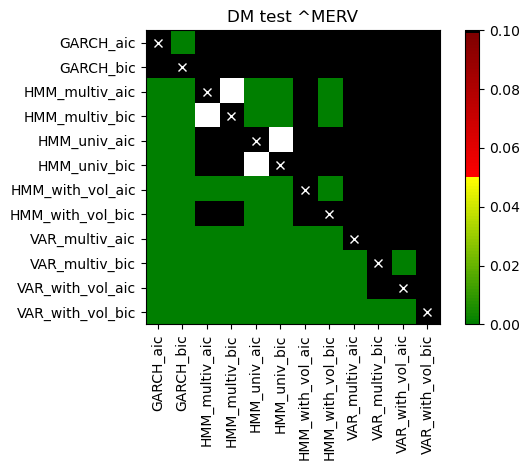

GGAL.BA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


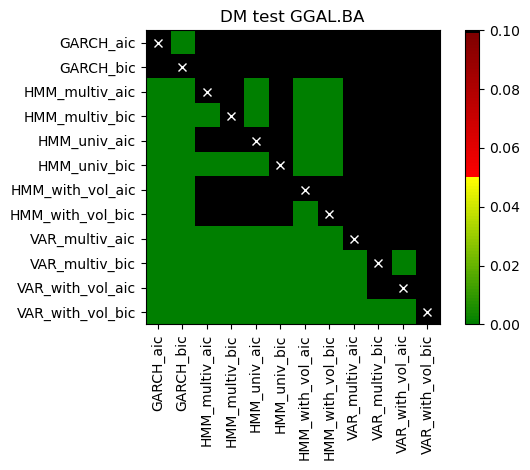

GGAL


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


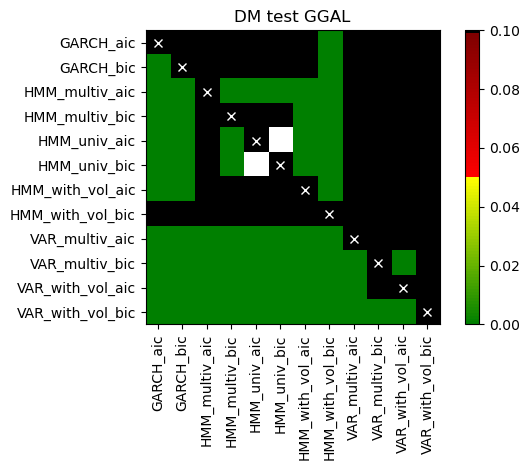

YPFD.BA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


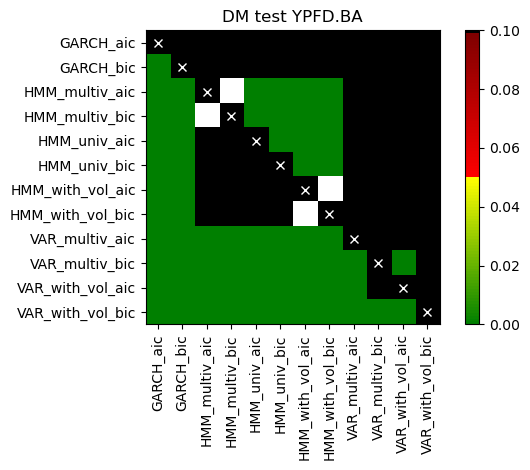

YPF


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


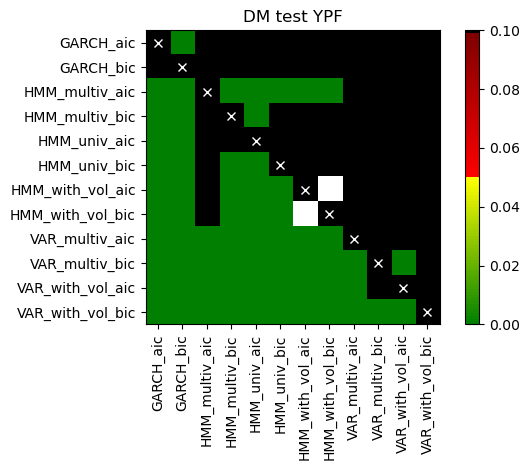

EDN.BA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


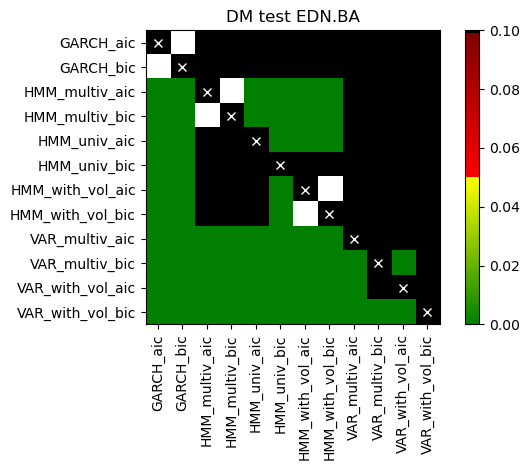

EDN


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


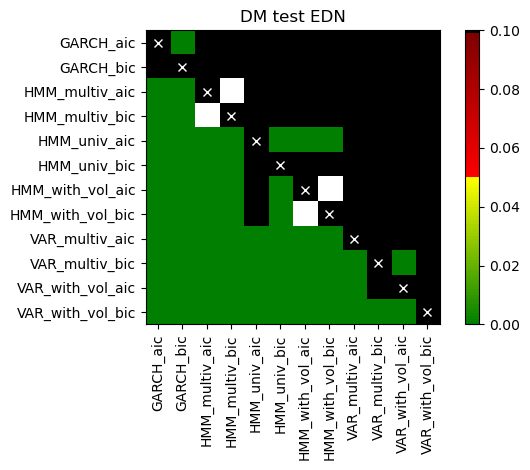

BMA.BA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


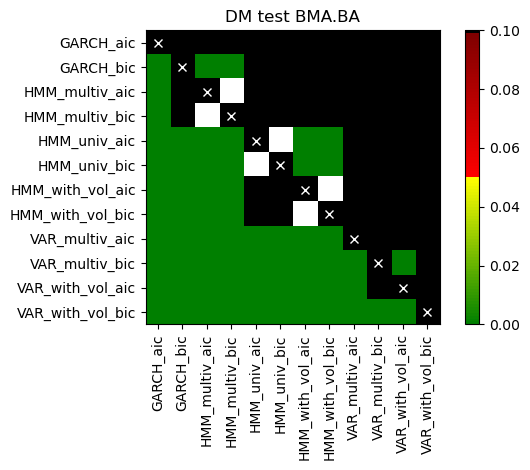

BMA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


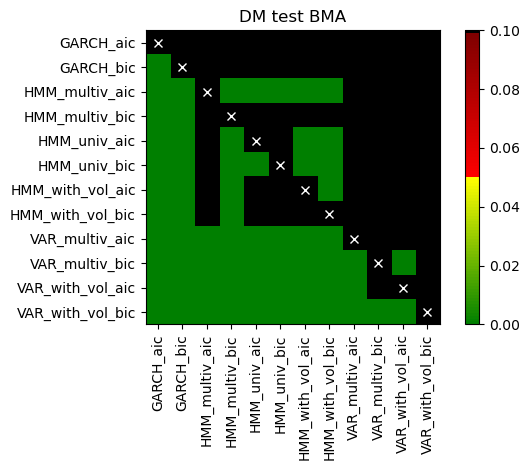

BBAR.BA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


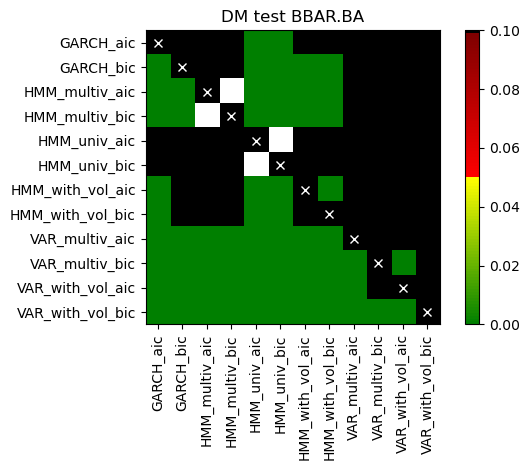

BBAR


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


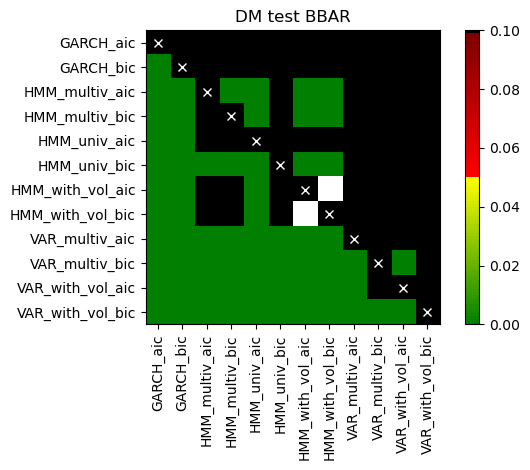

In [43]:
dmroute=os.path.join(graphsroute, "DM")
gwroute=os.path.join(graphsroute, "GW")

for stock in forecasts_by_stock.keys():
    print(stock)
    real_values=subset_of_columns(df_test, f"{stock}_log_rets")
    forecasts=delete_in_column_names(forecasts_by_stock[stock].fillna(0), f"__{stock}")   

    plot_multivariate_DM_test(real_price=real_values, 
                            forecasts=forecasts.fillna(0), 
                            title=f"DM test {stock}",
                            savefig=True,
                            path=dmroute)

In [44]:
residuals_by_stock

{'^MERV':             GARCH_aic__^MERV  GARCH_bic__^MERV  HMM_multiv_aic__^MERV  \
 2023-06-01          0.026022          0.026022                    NaN   
 2023-06-02         -0.005477         -0.005477                    NaN   
 2023-06-05          0.016149          0.016149               0.016410   
 2023-06-06          0.044972          0.044972               0.048072   
 2023-06-07         -0.005297         -0.005297              -0.006744   
 ...                      ...               ...                    ...   
 2024-01-02         -0.003813         -0.003718              -0.002429   
 2024-01-03          0.032545          0.033747               0.034375   
 2024-01-04          0.022904          0.022711               0.025081   
 2024-01-05               NaN               NaN               0.039079   
 2024-01-08               NaN               NaN               0.035820   
 
             HMM_multiv_bic__^MERV  HMM_univ_aic__^MERV  HMM_univ_bic__^MERV  \
 2023-06-01          

In [46]:
best_models_by_stock={stock:None for stock in residuals_by_stock.keys()}

for stock, dataframe in residuals_by_stock.items():
    dataframe = delete_in_column_names(dataframe, f"__{stock}")
    metrics_df = pd.DataFrame(index=["mse", "meanabs", "medianabs"])

    for column in dataframe.columns:
        single_model=pd.DataFrame(dataframe[column])
        
        metrics_df.loc["mse", column] = (
            (single_model**2).mean().mean()
        )
        metrics_df.loc["meanabs", column] = (
            single_model.abs().mean().mean()
        )
        metrics_df.loc["medianabs", column] = (
            (single_model.abs()).median().median()
        )
    metrics_df = metrics_df * 100
        
    best_dict={}
    for criterion in metrics_df.index:
        best_dict[criterion] = metrics_df.iloc[metrics_df.index==criterion].idxmin(axis="columns").values[0]
        
    best_models_by_stock[stock]= (metrics_df, best_dict)

In [47]:
best_models_by_stock["YPFD.BA"][1]

{'mse': 'VAR_multiv_aic',
 'meanabs': 'VAR_multiv_aic',
 'medianabs': 'VAR_multiv_aic'}

In [48]:
best_models_by_stock["YPFD.BA"][0]

,GARCH_aic,GARCH_bic,HMM_multiv_aic,HMM_multiv_bic,HMM_univ_aic,HMM_univ_bic,HMM_with_vol_aic,HMM_with_vol_bic,VAR_multiv_aic,VAR_multiv_bic,VAR_with_vol_aic,VAR_with_vol_bic
mse,0.197544,0.196964,0.179022,0.179022,0.150449,0.173690,0.181025,0.181025,0.114176,0.205680,0.178878,0.224020
meanabs,3.106104,3.119064,3.226051,3.226051,3.003230,3.218698,3.269827,3.269827,2.410157,3.179375,3.034292,3.308373
medianabs,2.304879,2.272720,2.486659,2.486659,2.294611,2.506263,2.557546,2.557546,1.730804,2.259751,2.307421,2.320572
